In [1]:
import pandas as pd
df = pd.read_csv('USA_Housing.csv')
print(df)

      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          79545.45857             5.682861                   7.009188   
1          79248.64245             6.002900                   6.730821   
2          61287.06718             5.865890                   8.512727   
3          63345.24005             7.188236                   5.586729   
4          59982.19723             5.040555                   7.839388   
...                ...                  ...                        ...   
4995       60567.94414             7.830362                   6.137356   
4996       78491.27543             6.999135                   6.576763   
4997       63390.68689             7.250591                   4.805081   
4998       68001.33124             5.534388                   7.130144   
4999       65510.58180             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09      230

<Axes: >

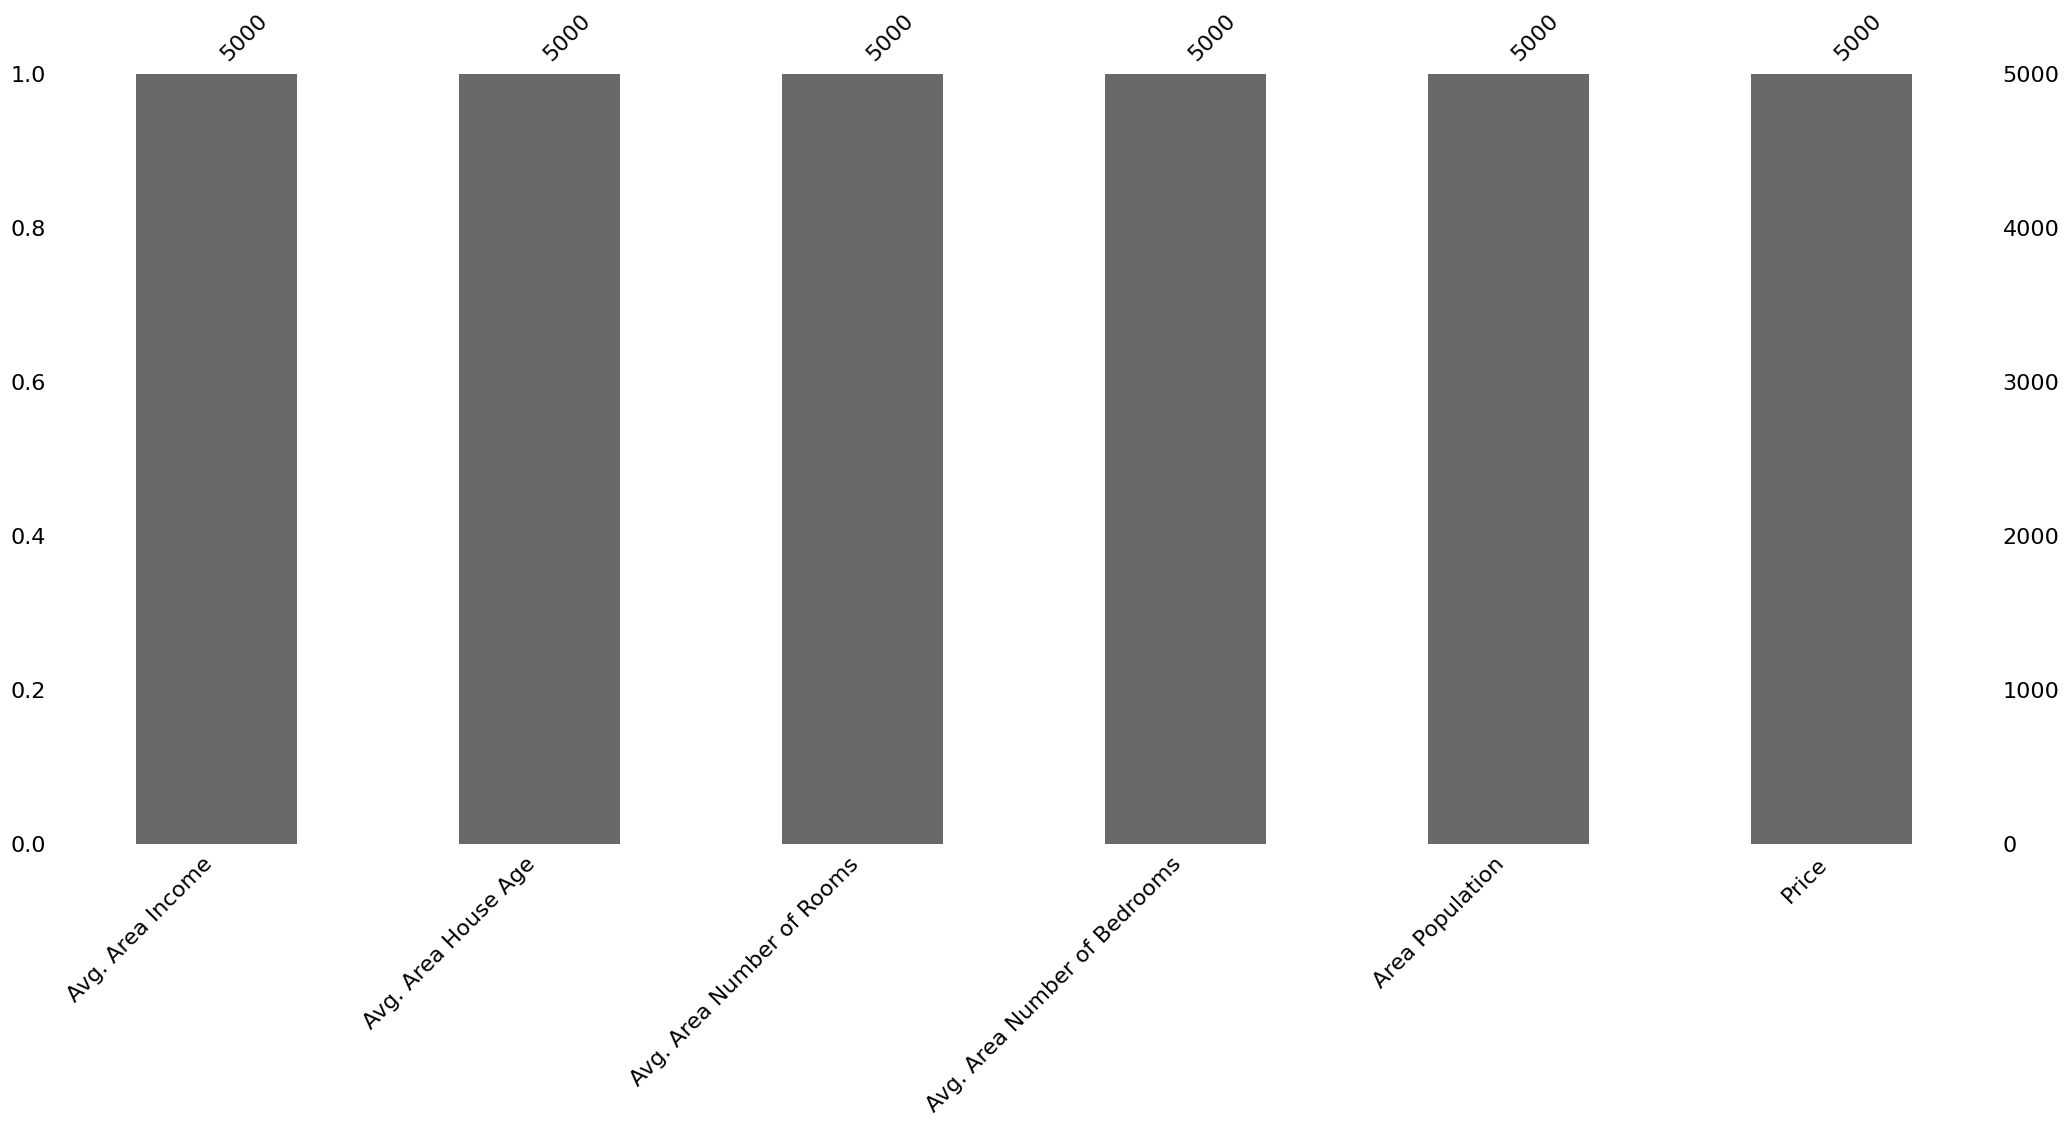

In [3]:
import missingno as ms
ms.bar(df)

<Axes: >

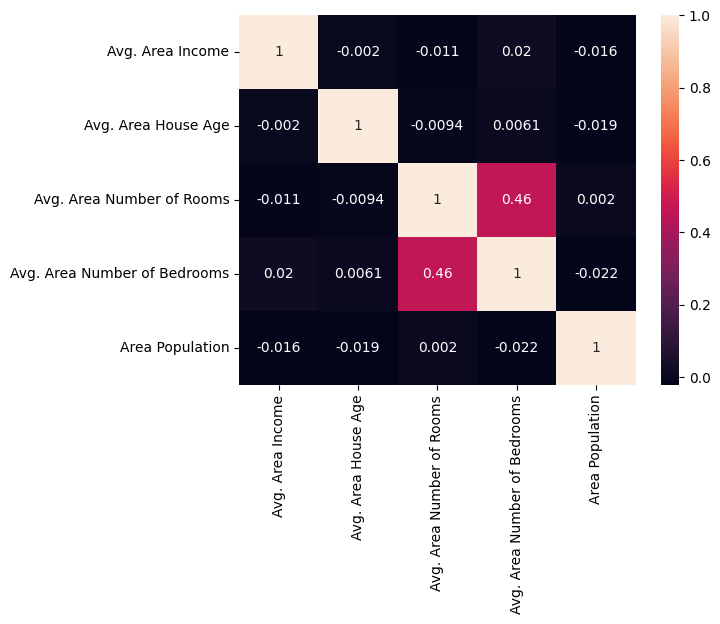

In [4]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:5].corr(),annot=True)

In [5]:
import numpy as np
X=df.iloc[:,0:5]
Y=df.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [7]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[1231278.63687691]
 [ 230464.52520478]
 [ 164159.19982569]
 [ 120514.71328324]
 [   2913.62424674]
 [ 151019.35865134]]


In [8]:
y_predict=X_test.dot(beta)
print(y_predict)

[[1308536.13611172]
 [1237122.72747115]
 [1243835.6280953 ]
 ...
 [1457119.79300222]
 [1483428.9529654 ]
 [1047510.59741982]]


In [9]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print(mean_square_error)
rms_error=np.sqrt(mean_square_error)
print(rms_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print(1-sum_square_error/total_variance)

10068422549.495703
100341.5295353609
0.9146818498916267


Complete Code

| Avg. Area Income   | Avg. Area House Age   | Avg. Area Number of Rooms   | Avg. Area Number of Bedrooms   | Area Population   | Price       |
|:-------------------|:----------------------|:----------------------------|:-------------------------------|:------------------|:------------|
| 79545.5            | 5.68286               | 7.00919                     | 4.09                           | 23086.8           | 1.05903e+06 |
| 79248.6            | 6.0029                | 6.73082                     | 3.09                           | 40173.1           | 1.50589e+06 |
| 61287.1            | 5.86589               | 8.51273                     | 5.13                           | 36882.2           | 1.05899e+06 |
| 63345.2            | 7.18824               | 5.58673                     | 3.26                           | 34310.2           | 1.26062e+06 |
| 59982.2            | 5.04055               | 7.83939                     | 4.23                           | 26354.1           | 630943

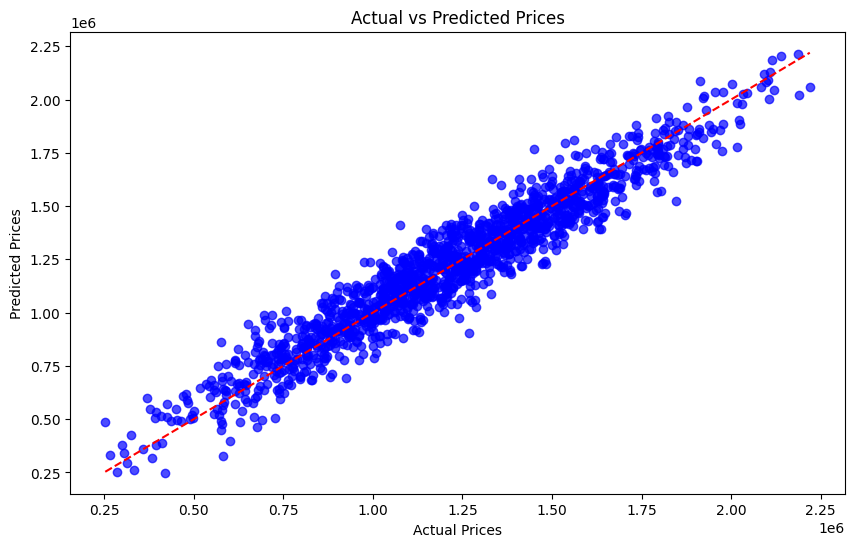

In [12]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv('USA_Housing.csv')
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df.info())

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df.drop('Price', axis=1)
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_scores = []
coefficients = []


for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]


    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    coefficients.append(model.coef_)

best_iteration = r2_scores.index(max(r2_scores))
best_coef = coefficients[best_iteration]

train_size = int(0.7 * len(X_scaled))
X_train_final, X_test_final = X_scaled[:train_size], X_scaled[train_size:]
y_train_final, y_test_final = y[:train_size], y[train_size:]


final_model = LinearRegression()
final_model.coef_ = best_coef  
final_model.intercept_ = model.intercept_  
final_model.fit(X_train_final, y_train_final)  


y_pred_final = final_model.predict(X_test_final)


final_r2 = r2_score(y_test_final, y_pred_final)


print(f"Final R-squared on the test set: {final_r2}")
print(f"Best coefficients: {best_coef}")

plt.figure(figsize=(10,6))
plt.scatter(y_test_final, y_pred_final, alpha=0.7, color='b')
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
